<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.248573,99.079920,96.811641,0.001622,256.141756,256.141015,0.000742
1,0.0,1.0,39.369962,27.125956,26.085393,0.001104,102.582415,102.579165,0.003250
2,0.0,2.0,60.015582,47.462801,26.627620,0.002064,144.108067,144.104784,0.003282
3,0.0,3.0,60.185199,43.372523,22.005970,-0.012045,135.551648,135.562306,-0.010658
4,0.0,4.0,63.254878,43.379839,81.074642,0.003252,197.712611,197.708178,0.004432
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.829894,33.736575,20.327001,0.006140,119.899610,119.892673,0.006937
249996,999.0,246.0,27.077073,71.616059,46.338178,0.000866,155.032175,155.030390,0.001785
249997,999.0,247.0,44.052168,98.727864,29.609217,0.000258,182.389507,182.387955,0.001551
249998,999.0,248.0,63.461570,84.150427,41.673029,0.002341,199.287366,199.284407,0.002959


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.248573,99.079920,96.811641,0.001622,256.141756,256.141015,0.000742
1,0.0,1.0,39.369962,27.125956,26.085393,0.001104,102.582415,102.579165,0.003250
2,0.0,2.0,60.015582,47.462801,26.627620,0.002064,144.108067,144.104784,0.003282
3,0.0,3.0,60.185199,43.372523,22.005970,-0.012045,135.551648,135.562306,-0.010658
4,0.0,4.0,63.254878,43.379839,81.074642,0.003252,197.712611,197.708178,0.004432
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.829894,33.736575,20.327001,0.006140,119.899610,119.892673,0.006937
249996,999.0,246.0,27.077073,71.616059,46.338178,0.000866,155.032175,155.030390,0.001785
249997,999.0,247.0,44.052168,98.727864,29.609217,0.000258,182.389507,182.387955,0.001551
249998,999.0,248.0,63.461570,84.150427,41.673029,0.002341,199.287366,199.284407,0.002959


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.248573  99.079920  96.811641  0.001622  256.141756   
      1.0    39.369962  27.125956  26.085393  0.001104  102.582415   
      2.0    60.015582  47.462801  26.627620  0.002064  144.108067   
      3.0    60.185199  43.372523  22.005970 -0.012045  135.551648   
      4.0    63.254878  43.379839  81.074642  0.003252  197.712611   
...                ...        ...        ...       ...         ...   
999.0 245.0  55.829894  33.736575  20.327001  0.006140  119.899610   
      246.0  27.077073  71.616059  46.338178  0.000866  155.032175   
      247.0  44.052168  98.727864  29.609217  0.000258  182.389507   
      248.0  63.461570  84.150427  41.673029  0.002341  199.287366   
      249.0  80.202711  52.907338  22.322176  0.001261  165.433486   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    256.141015  0.000742  
      1.0    102.579165  0.003250  
      2.0    144.104784  0.003282  
      3.0    135.562306 -0.010658  
      4.0    197.708178  0.004432  
...                 ...       ...  
999.0 245.0  119.892673  0.006937  
      246.0  155.030390  0.001785  
      247.0  182.387955  0.001551  
      248.0  199.284407  0.002959  
      249.0  165.431657  0.001829  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.248573  99.079920  96.811641  0.001622  256.141756   
      1.0    39.369962  27.125956  26.085393  0.001104  102.582415   
      2.0    60.015582  47.462801  26.627620  0.002064  144.108067   
      3.0    60.185199  43.372523  22.005970 -0.012045  135.551648   
      4.0    63.254878  43.379839  81.074642  0.003252  197.712611   
...                ...        ...        ...       ...         ...   
999.0 245.0  55.829894  33.736575  20.327001  0.006140  119.899610   
      246.0  27.077073  71.616059  46.338178  0.000866  155.032175   
      247.0  44.052168  98.727864  29.609217  0.000258  182.389507   
      248.0  63.461570  84.150427  41.673029  0.002341  199.287366   
      249.0  80.202711  52.907338  22.322176  0.001261  165.433486   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    256.141015  0.000742  
      1.0    102.579165  0.003250  
      2.0    144.104784  0.003282  
      3.0    135.562306 -0.010658  
      4.0    197.708178  0.004432  
...                 ...       ...  
999.0 245.0  119.892673  0.006937  
      246.0  155.030390  0.001785  
      247.0  182.387955  0.001551  
      248.0  199.284407  0.002959  
      249.0  165.431657  0.001829  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.248573,99.079920,96.811641,0.001622,256.141756,256.141015,0.000742
1,0.0,1.0,39.369962,27.125956,26.085393,0.001104,102.582415,102.579165,0.003250
2,0.0,2.0,60.015582,47.462801,26.627620,0.002064,144.108067,144.104784,0.003282
3,0.0,3.0,60.185199,43.372523,22.005970,-0.012045,135.551648,135.562306,-0.010658
4,0.0,4.0,63.254878,43.379839,81.074642,0.003252,197.712611,197.708178,0.004432
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.829894,33.736575,20.327001,0.006140,119.899610,119.892673,0.006937
249996,999.0,246.0,27.077073,71.616059,46.338178,0.000866,155.032175,155.030390,0.001785
249997,999.0,247.0,44.052168,98.727864,29.609217,0.000258,182.389507,182.387955,0.001551
249998,999.0,248.0,63.461570,84.150427,41.673029,0.002341,199.287366,199.284407,0.002959


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.248573  99.079920  96.811641  0.001622  256.141756   
      1.0    39.369962  27.125956  26.085393  0.001104  102.582415   
      2.0    60.015582  47.462801  26.627620  0.002064  144.108067   
      3.0    60.185199  43.372523  22.005970 -0.012045  135.551648   
      4.0    63.254878  43.379839  81.074642  0.003252  197.712611   
...                ...        ...        ...       ...         ...   
999.0 245.0  55.829894  33.736575  20.327001  0.006140  119.899610   
      246.0  27.077073  71.616059  46.338178  0.000866  155.032175   
      247.0  44.052168  98.727864  29.609217  0.000258  182.389507   
      248.0  63.461570  84.150427  41.673029  0.002341  199.287366   
      249.0  80.202711  52.907338  22.322176  0.001261  165.433486   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    256.141015  0.000742  
      1.0    102.579165  0.003250  
      2.0    144.104784  0.003282  
      3.0    135.562306 -0.010658  
      4.0    197.708178  0.004432  
...                 ...       ...  
999.0 245.0  119.892673  0.006937  
      246.0  155.030390  0.001785  
      247.0  182.387955  0.001551  
      248.0  199.284407  0.002959  
      249.0  165.431657  0.001829  

[250000 rows x 7 columns]

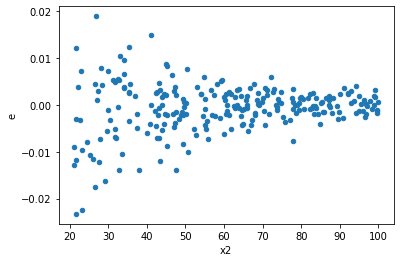

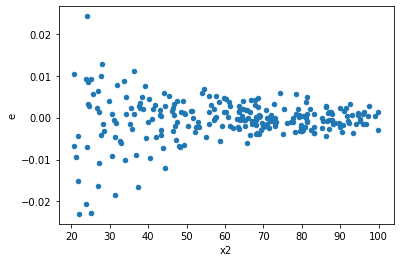

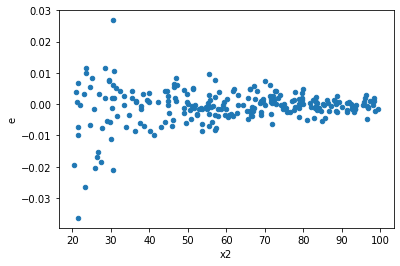

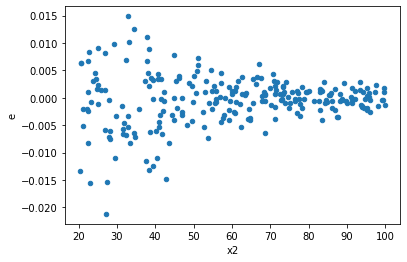

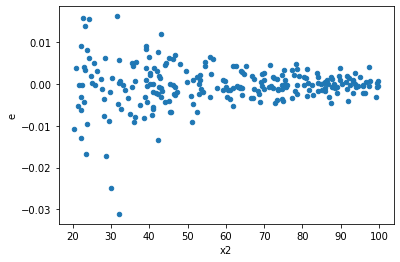

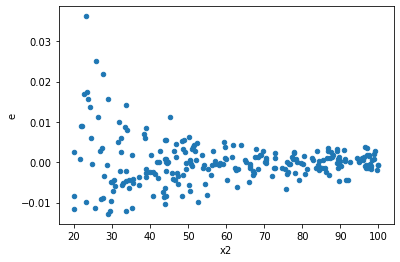

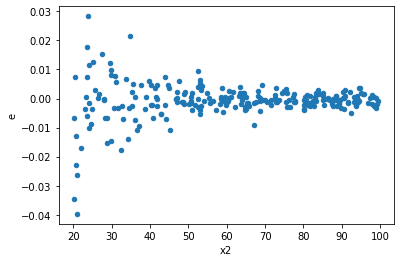

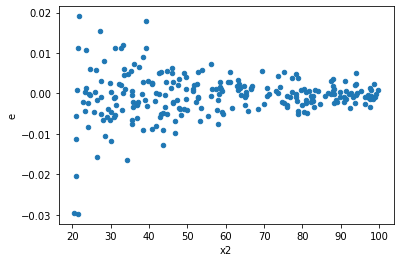

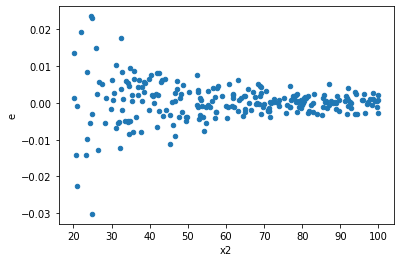

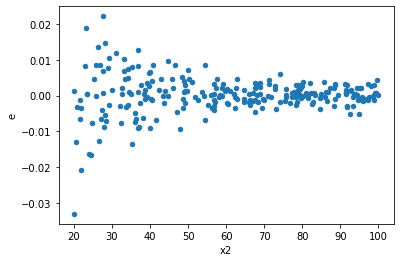

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
261.0,97.0,97.0,0.0028339106529204653,0.003178003591286692,2.9215573741448096e-05,3.276292362151229e-05,1.1214198259961456,0.5736311492436625,0.7131844253781687,0.28681557462183127,Reject001=1 : Homoscedasticity
340.0,97.0,97.0,0.0051185765444751175,0.005684726700207534,5.276883035541358e-05,5.860542989904674e-05,1.1106069530880625,0.606442645393251,0.6967786773033745,0.3032213226966255,Reject001=1 : Homoscedasticity
573.0,97.0,97.0,0.0025053727639655623,0.002604277834664878,2.582858519552126e-05,2.6848225099637915e-05,1.0394771876352509,0.8491784439782699,0.575410778010865,0.42458922198913496,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.0043270255161384705,0.001604235556489572,4.460851047565433e-05,1.6538510891645073e-05,0.37074788454707935,1.761069242556817e-06,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,0.004698921965176508,0.0009520103220978556,4.8442494486355753e-05,9.814539403070676e-06,0.20260185828859464,7.598894886645792e-14,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,0.004879133835686718,0.00208532550577973,5.030034882151255e-05,2.149820109051268e-05,0.4273966601463863,3.872831132453059e-05,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,0.003430677455666737,0.0009081459228502199,3.536780882130657e-05,9.362329101548659e-06,0.2647132919331018,2.7929333052543404e-10,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,0.0035101809542363526,0.0011284848590017126,3.618743251790054e-05,1.163386452579085e-05,0.32148908381483055,5.4921362669962915e-08,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,0.004339416296844054,0.0008960855304679006,4.473625048292839e-05,9.237995159462894e-06,0.20649909323509724,1.4097946636522572e-13,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,0.008363786190742654,0.000670644890768195,8.622459990456345e-05,6.9138648532803606e-06,0.08018436572547602,5.950440773544215e-29,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,0.004510843898345647,0.001380719080247956,4.650354534376955e-05,1.4234217322143875e-05,0.3060888630516199,1.533684556149928e-08,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,0.004650106522688823,0.0015427436724171307,4.793924250194663e-05,1.5904573942444646e-05,0.3317652326650514,1.2174767450683023e-07,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    983
Reject001=1 : Homoscedasticity       17
Name: Result_test, dtype: int64